In [1]:
import np as np
from sklearn import preprocessing
import numpy as np
import pandas as pd
import scipy
import tpot.export_utils
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from tpot.export_utils import set_param_recursive
import matplotlib.pyplot as plt
import pickle
min_max_scaler = preprocessing.MinMaxScaler()
import joblib

In [2]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('../data/cclebeta.csv', index_col=0)
features = tpot_data[['1026', '4680', '83468', '23242', '56034', '84141', '1825', '8204', '91947', '27324', '5325', '81792', '195814', '23052', '26136', '26103', '11227', '1294', '9966', '169834', '100129196', '100128098', '200159', '163183', '56925', '146713', '10653', '26080', '355', '5816', '3883', '283352', '8518', '857', '56180', '339976', '8125', '3400', '255743', '54221', '90161', '100506606', '51706', '400940', '79836', '3625', '144406', '9014', '7739', '11254', '83450', '9607', '339535', '119395', '412', '256764', '3859', '140886', '92421', '84152', '124093', '11136', '79083', '1795', '261734', '57732', '6558', '132430', '650794', '643616', '388698', '7045', '162494', '399949', '79822', '57619', '9615', '1509', '57787', '1365', '118426', '84692', '767', '5720', '100653022', '84752', '7803', '65059', '160857', '55286', '7369', '55752', '8418', '9369', '79602', '286827', '54716', '128025', '114788', '6662', '2203', '10962', '6502', '79166', '27342', '6764', '400566', '222696', '26577', '64208', '286530', '6319', '26164', '57001', '54545', '7103', '7070', '54935', '222962', '5172', '29988', '151278', '23464', '9488', '5617', '132321', '7403', '776', '586', '30009', '29761', '573', '1734', '7032', '10170', '4100', '79838', '2312', '57459', '27020', '57480', '148109', '56659', '5217', '9961', '54751', '3713', '162966', '283576', '5519', '92292', '4885', '285386', '130940', '79400', '339803', '54520', '306', '65983', '65055', '282980', '112942', '4065', '389289', '6566', '5342', '389932', '118430', '135152', '65109', '732253', '8521', '100292680', '9692', '91646', '642636', '282775', '57169', '9768', '6338', '8504', '140686', '57710', '164684', '55217', '81853', '729967', '83887', '6275', '131616', '51806', '10866', '256227', '10473', '339988', '30010', '55283', '50840', '9696', '9099', '9093', '135932', '26999', '4126', '10548', '84766', '116123', '3934', '7844', '7766', '54842', '203414', '2067', '285313', '55268', '100506530', '9514', '6457', '126661', '55425', '378828', '80727', '3069', '10551', '339210', '9289', '55297', '65990', '640', '51450', '3615', '196993', '11068', '404201', '7031', '170712', '64425', '996', '3157', '79776', '5927', '3741', '4660', '280665', '3767', '64651', '85509', '9757', '563', '4781', '27236', '8365', '100133319', '2566', '123041', '10265', '128486', '9532', '64843', '10628', '10010', '51146', '91120', '8349', '54682', '151176', '54457', '284083', '60509', '10742', '341676', '84525', '369', '1284', '4938', '4250', '7515', '6549', '7341', '339366', '7832', '6091', '63933', '10875', '4633', '100507670', '3875', '6422', '1293', '202333', '399665', '8975', '51010', '1832', '7762', '4905', '80144', '493869', '729', '799', '57150', '86', '84830', '5573', '250', '80237', '84319', '27101', '2259', '9245', '55076', '1462', '130560', '8828', '2799', '340252', '51660', '9806', '5982', '1290', '85016', '57546', '597', '25996', '6947', '401588', '79027', '6820', '8707', '286046', '5118', '117531', '79183', '285855', '5054', '79152', '51060', '80853', '400748', '6368', '285957', '10463', '4151', '7345', '284361', '84318', '51351', '100131510', '1434', '119710', '27122', '9754', '100505696', '1289', '54915', '81696', '140606', '6160', '653238', '400793', '2644', '7913', '140738', '2706', '1545', '80032', '8480', '22903', '94081', '4199', '375484', '90139', '3817', '154214', '2321', '388564', '57758', '307', '26227', '51738', '3422', '115106', '1308', '2196', '55607', '150005', '64782']]
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Beta'], random_state=123)

In [3]:
training_features_minmax = min_max_scaler.fit_transform(training_features)
# testing_features_minmax = min_max_scaler.transform(testing_features)


In [4]:
# Average CV score on the training set was: -0.4775086660707946
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVR(C=0.01, dual=False, epsilon=0.0001, loss="squared_epsilon_insensitive", tol=0.001)),
    XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.7500000000000001, verbosity=0)
)

In [5]:
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 123)

In [6]:
exported_pipeline.fit(training_features, training_target)

C:\Users\Udi\Documents\GitHub\RadiationProject\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=LinearSVR(C=0.01, dual=False,
                                                       epsilon=0.0001,
                                                       loss='squared_epsilon_insensitive',
                                                       random_state=123,
                                                       tol=0.001))),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categoric...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=3, max_leaves=0, min_child_weight=2,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=1, num_parallel_tree=1,
                              predictor='auto', random_state=123, reg_alpha=0,
                              reg_lambda=1, ...))])

In [7]:
# print(testing_target.to_list())
# new_test_list = []
# print(len(new_test_list))
# for i in range(len(testing_target)):
#     if testing_target[i] < 10e-5:
#         pass
#     else:
#         new_test_list.append(testing_target[i])
# print(len(new_test_list))
#

print(type(testing_features))
df_good = pd.concat([testing_features, testing_target], axis=1)
df_good.head()

<class 'pandas.core.frame.DataFrame'>


,1026,4680,83468,23242,56034,84141,1825,8204,91947,27324,...,26227,51738,3422,115106,1308,2196,55607,150005,64782,Beta
snu466,10.905571,4.557559,4.464759,7.625452,8.716644,10.336776,3.938341,7.737642,10.185589,3.758897,...,7.739898,4.111759,9.095239,9.078005,3.749954,3.918545,4.588412,3.458571,8.228588,4.671000e-07
cov644,7.788872,10.479647,3.929805,9.058193,6.781435,3.552589,3.669122,8.536770,9.653811,5.681910,...,9.109744,4.089347,10.522300,8.721195,3.750699,3.931869,5.350536,3.436505,7.811748,3.111000e-07
nb1,9.431411,4.716503,4.046382,4.307312,3.515094,3.781411,3.705866,10.078446,6.020789,3.673599,...,10.924928,3.979720,9.425908,10.248016,3.813228,3.850815,5.744069,3.377917,8.106103,8.682000e-08
lk2,7.069748,9.643423,3.869814,5.487356,7.246310,3.824297,6.095713,8.945462,7.045600,7.676919,...,10.466793,4.099561,9.677686,10.530296,3.895151,3.915174,6.173705,3.286896,8.195454,2.147000e-02
nugc3,7.801929,6.754689,3.781120,4.914291,7.237895,6.017430,3.849368,10.287647,7.625267,3.541558,...,8.628049,4.243885,10.085004,10.881296,3.965721,3.739505,6.377673,3.700046,7.273231,1.617000e-08


In [8]:
listcheck = []
threshold = 10e-5
for i in range(len(df_good)):
    if df_good.iloc[i]['Beta'] < threshold:
        #df_good.iloc[i]['Beta'] = 0
        listcheck.append(0)
    else:
        listcheck.append(df_good.iloc[i]['Beta'])
print(listcheck)
df_good['Beta'] = listcheck

[0, 0, 0, 0.02147, 0, 0.01292, 0.0006237, 0, 0.009423, 0.008762, 0, 0, 0, 0, 0, 0.027, 0.04113, 0.04781, 0, 0, 0, 0, 0.0002, 0.03141, 0.006454, 0.006197, 0, 0, 0.00848, 0.01881, 0.03786, 0, 0, 0, 0.02174, 0.001044, 0.02162, 0.003035, 0, 0.02534, 0, 0.02534, 0, 0.01309, 0, 0.0288, 0, 0, 0.01519, 0.03857, 0.0002588, 0.0202, 0.006825, 0.01334, 0.03424, 0, 0.01398, 0.03817, 0.02387, 0.04771, 0, 0.01529, 0, 0, 0.01414, 0.0174199999999999, 0, 0, 0, 0, 0, 0.02842, 0.02582, 0, 0.0301, 0, 0, 0.01531, 0, 0, 0, 0, 0, 0, 0, 0, 0.003377, 0.02041, 0.04226, 0.01182, 0, 0.02814, 0, 0, 0.007534, 0, 0, 0.002915, 0, 0.005219, 0, 0, 0.02018, 0, 0.006953, 0.0175099999999999, 0, 0, 0.001773, 0, 0.008589, 0, 0, 0, 0, 0.01522, 0, 0, 0, 0.03611, 0, 0, 0.03077, 0.004117]


In [9]:
df_good.head()

,1026,4680,83468,23242,56034,84141,1825,8204,91947,27324,...,26227,51738,3422,115106,1308,2196,55607,150005,64782,Beta
snu466,10.905571,4.557559,4.464759,7.625452,8.716644,10.336776,3.938341,7.737642,10.185589,3.758897,...,7.739898,4.111759,9.095239,9.078005,3.749954,3.918545,4.588412,3.458571,8.228588,0.00000
cov644,7.788872,10.479647,3.929805,9.058193,6.781435,3.552589,3.669122,8.536770,9.653811,5.681910,...,9.109744,4.089347,10.522300,8.721195,3.750699,3.931869,5.350536,3.436505,7.811748,0.00000
nb1,9.431411,4.716503,4.046382,4.307312,3.515094,3.781411,3.705866,10.078446,6.020789,3.673599,...,10.924928,3.979720,9.425908,10.248016,3.813228,3.850815,5.744069,3.377917,8.106103,0.00000
lk2,7.069748,9.643423,3.869814,5.487356,7.246310,3.824297,6.095713,8.945462,7.045600,7.676919,...,10.466793,4.099561,9.677686,10.530296,3.895151,3.915174,6.173705,3.286896,8.195454,0.02147
nugc3,7.801929,6.754689,3.781120,4.914291,7.237895,6.017430,3.849368,10.287647,7.625267,3.541558,...,8.628049,4.243885,10.085004,10.881296,3.965721,3.739505,6.377673,3.700046,7.273231,0.00000


In [10]:
# df_good.to_csv('../data/df_with_zeroes.csv')
test_with_zeroes = df_good['Beta'].to_list()
# print(type(test_with_zeroes))
# print(test_with_zeroes.shape)
# print(testing_features.shape)test_with_zeroes
results_zeroes = exported_pipeline.predict(testing_features)

C:\Users\Udi\Documents\GitHub\RadiationProject\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


RMSE :  0.015338
Slope: 0.006123613201194722
Intercept: 3.7604813653275616e-05
R-Squared: 0.5292113320770115
P-Value: 1.0848732069697468e-21
Standard Error: 0.0005229091821581754


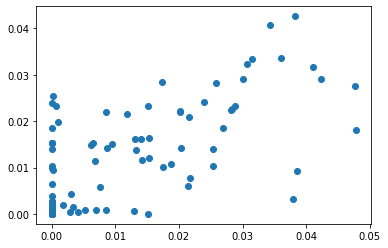

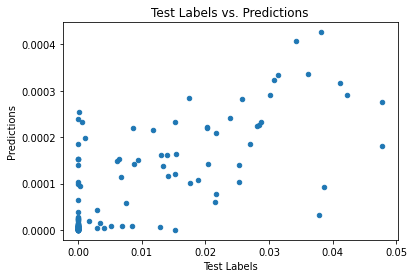

In [11]:
# # RMSE Computation
# results_zeroes2 = []
# for i in results_zeroes :
#     if i < threshold:
#
#         results_zeroes2.append(0)
#     else:
#         results_zeroes2.append(i)
# results_zeroes2 = np.array(results_zeroes2)
# rmse = np.sqrt(MSE(test_with_zeroes, results_zeroes2/100))
# print("RMSE : % f" %(rmse))
# # R2 Computation
# import scipy.stats as stats
# # print(y_test.tolist())
# # print(y_pred_list)
# plt.plot(test_with_zeroes, results_zeroes2, 'o')
# plotting_df = pd.DataFrame()
# plotting_df['Actual'] = test_with_zeroes
# plotting_df['Predicted'] = results_zeroes2/100
# plotting_df.to_csv('../data/plotting.csv')
# plotting_df.plot(x='Actual', y='Predicted', kind='scatter')
#
# #a, b = np.polyfit(test_with_zeroes, results_zeroes2/100, 1)
# #plt.plot(test_with_zeroes, a*test_with_zeroes+b, color='steelblue', linestyle='--', linewidth=2)
# slope, intercept, r_value, p_value, std_err = stats.linregress(test_with_zeroes, results_zeroes2/100)
# print("Slope:", slope)
# print("Intercept:", intercept)
# print("R-Squared:", r_value**2)
# print("P-Value:", p_value)
# print("Standard Error:", std_err)
# plt.xlabel('Test Labels')
# plt.ylabel('Predictions')
# plt.title('Test Labels vs. Predictions')
# plt.show()

RMSE :  0.015338
Slope: 0.006128799889895792
Intercept: 3.7462564041874386e-05
R-Squared: 0.5292679235796196
P-Value: 1.0768910570174223e-21
Standard Error: 0.0005232926507844118


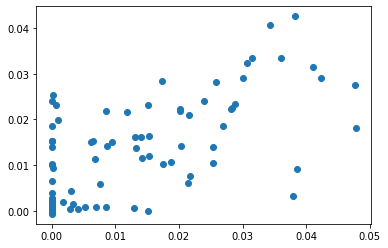

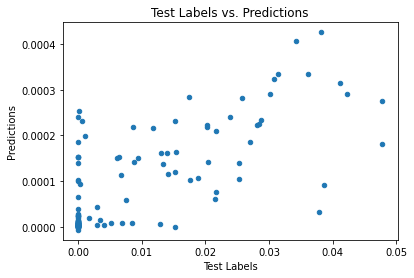

In [14]:
import numpy as np
# results_zeroes2 = np.array(results_zeroes)
rmse = np.sqrt(MSE(testing_target, results_zeroes/100))
print("RMSE : % f" %(rmse))
# R2 Computation
import scipy.stats as stats
# print(y_test.tolist())
# print(y_pred_list)
plt.plot(test_with_zeroes, results_zeroes, 'o')
plotting_df = pd.DataFrame()
plotting_df['Actual'] = testing_target
plotting_df['Predicted'] = results_zeroes/100
plotting_df.to_csv('../data/plotting.csv')
plotting_df.plot(x='Actual', y='Predicted', kind='scatter')

#a, b = np.polyfit(test_with_zeroes, results_zeroes2/100, 1)
#plt.plot(test_with_zeroes, a*test_with_zeroes+b, color='steelblue', linestyle='--', linewidth=2)
slope, intercept, r_value, p_value, std_err = stats.linregress(testing_target, results_zeroes/100)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()

In [12]:
joblib.dump(exported_pipeline, 'classifier.pkl')

['classifier.pkl']